Objective:

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
# check file presence in right directory
import os
os.listdir()

['.ipynb_checkpoints', 'Exercise1_Logistic_Binary.ipynb', 'HR_comma_sep.csv']

In [2]:
# yes 'HR_comma_sep.csv' file is their
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load the data
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Figure out which variables have direct and clear impact on employee retention
left = data[data.left==1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
retained = data[data.left == 0]
retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [7]:
# Average numbers for all columns
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


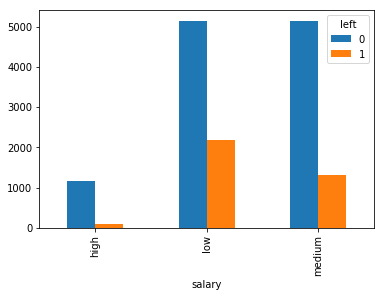

In [8]:
# Impact of salary on employee retention
pd.crosstab(data.salary, data.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

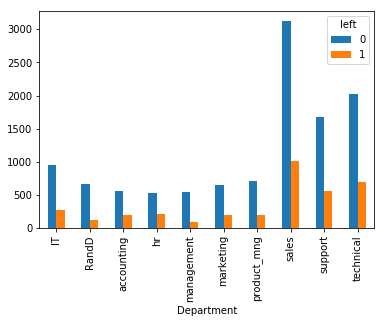

In [9]:
# Impact of Department on employees retention
pd.crosstab(data.Department, data.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention (all depts are not likey to leave the company) but it is not major hence we will ignore department in our analysis

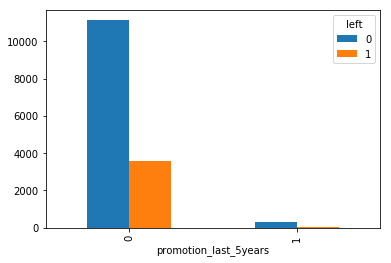

In [10]:
# Impact of promotion_last_5years on employees retention
pd.crosstab(data.promotion_last_5years, data.left).plot(kind='bar')

From the above chart there seem to be whoever promotion not happened for last 5 years likely to not leave the company

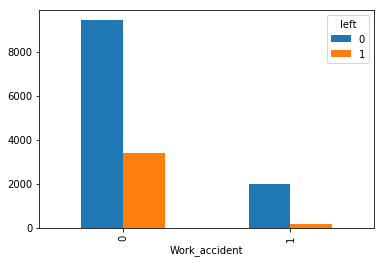

In [11]:
# Impact of Work_accident on employees retention
pd.crosstab(data.Work_accident, data.left).plot(kind='bar')

From the above chart there seem to be whovever work accident not happened likely to not leave the company

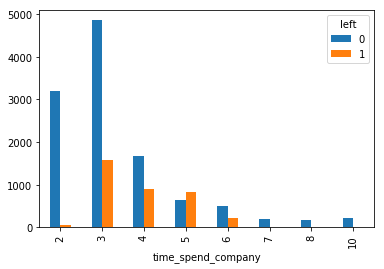

In [12]:
# Impact of time_spend_company on empoyees retention
pd.crosstab(data.time_spend_company, data.left).plot(kind='bar')

From the above chart there seem likely to not leave the company for all time spends as high ratio for left=0(blue). So this is not major hence will ignore this for analysis.

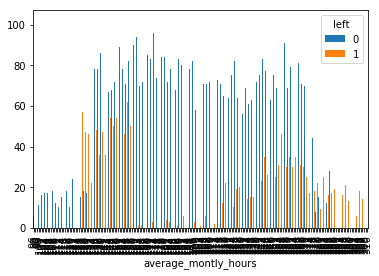

In [13]:
# Impact of average_montly_hours on empoyees retention
pd.crosstab(data.average_montly_hours, data.left).plot(kind='bar')

Not sure how to conculde this one

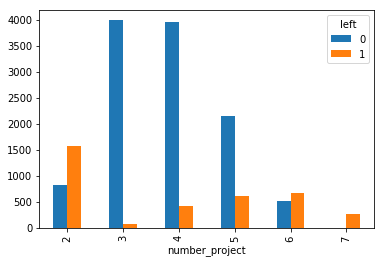

In [14]:
# Impact of number_project on employees retention
pd.crosstab(data.number_project, data.left).plot(kind='bar')

Above bar chart shows employees whover has done 3/4/5 projects are likely to not leave the company. So this is not major hence will ignore this for analysis.

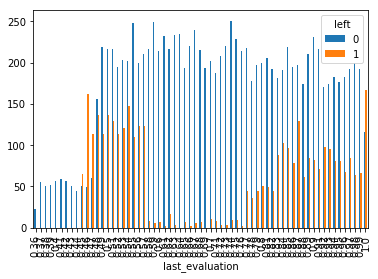

In [15]:
# Impact of last_evaluation on employees retention
pd.crosstab(data.last_evaluation, data.left).plot(kind='bar')

Not sure how to conculde this one

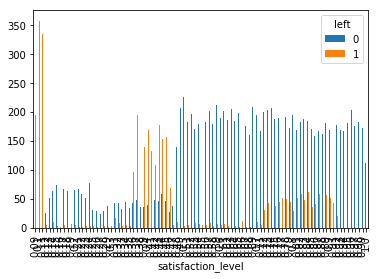

In [16]:
# Impact of satisfaction_level on employees retention
pd.crosstab(data.satisfaction_level, data.left).plot(kind='bar')

Not sure how to conculde this one but look like more chances to leave the company for some inital values.

#### From the data analysis so far i can conclude followng are independent and dependent variables.

* independent variables
    1. satisfaction_level
    2. Work_accident
    3. promotion_last_5years
    4. salary
    
    
* dependent variable
    1. left
    
    
* Not sure  
  1. average_montly_hours
  2. last_evaluation


In [17]:
# Let's build a model without Not sure parameters.
indep_data = data[['satisfaction_level', 'Work_accident','promotion_last_5years','salary']]
indep_data.head()

,satisfaction_level,Work_accident,promotion_last_5years,salary
0,0.38,0,0,low
1,0.80,0,0,medium
2,0.11,0,0,medium
3,0.72,0,0,low
4,0.37,0,0,low


In [30]:
# convert salary column texts to numbers using pandas get method
salary_dummies = pd.get_dummies(indep_data.salary, prefix='salary')

In [31]:
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [32]:
# merge into independent data
indep_with_salary_dummies = pd.concat([indep_data, salary_dummies], axis='columns')
indep_with_salary_dummies.head()

,satisfaction_level,Work_accident,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,0,0,low,0,1,0
1,0.80,0,0,medium,0,0,1
2,0.11,0,0,medium,0,0,1
3,0.72,0,0,low,0,1,0
4,0.37,0,0,low,0,1,0


In [33]:
# remove salary column 
# dummy variable trap : and also one of dummy variable salary column let's say 'salary medium'
indep_with_salary_dummies.drop(['salary','salary_medium'], axis='columns', inplace=True)
indep_with_salary_dummies.head()

,satisfaction_level,Work_accident,promotion_last_5years,salary_high,salary_low
0,0.38,0,0,0,1
1,0.80,0,0,0,0
2,0.11,0,0,0,0
3,0.72,0,0,0,1
4,0.37,0,0,0,1


In [35]:
# Now our final independent and dependent variables are :
X = indep_with_salary_dummies
y = data.left

In [36]:
# Split the Train and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Train the Model
from sklearn.linear_model import LogisticRegression
# create logistic model object
model = LogisticRegression()

In [38]:
# actual train with fit
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
X_test.head()

,satisfaction_level,Work_accident,promotion_last_5years,salary_high,salary_low
427,0.55,0,0,0,0
5290,0.59,0,0,0,0
12530,0.40,0,0,0,0
329,0.44,0,0,0,1
14517,0.37,0,0,1,0


In [40]:
# predict
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Accuracy of model

In [41]:
model.score(X_test, y_test)

0.797

In [42]:
model.predict_proba(X_test)

array([[0.75890824, 0.24109176],
       [0.78541661, 0.21458339],
       [0.64133338, 0.35866662],
       ...,
       [0.92355063, 0.07644937],
       [0.97483756, 0.02516244],
       [0.72624022, 0.27375978]])